# Predicting future sales 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
sales = pd.read_csv('data/sales_train.csv')
sales['item_cnt_day'] = sales['item_cnt_day'].astype(np.int64)
sales.date = sales.date.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1
1,2013-01-03,0,25,2552,899.00,1
2,2013-01-05,0,25,2552,899.00,-1
3,2013-01-06,0,25,2554,1709.05,1
4,2013-01-15,0,25,2555,1099.00,1


In [3]:
items = pd.read_csv('data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
item_category = pd.read_csv('data/item_categories.csv')
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id']).sum()

In [7]:
monthly_sales.head()

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              0       32            884.0             6
                       33           1041.0             3
                       35            247.0             1
                       43            221.0             1
                       51            257.0             2

In [8]:
#Aggragate based on unique month, shop and item
shopmonthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'date': ['min', 'max'], 'item_price': 'mean', 'item_cnt_day': 'sum'})

In [9]:
monthly_sales.head()

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              0       32            884.0             6
                       33           1041.0             3
                       35            247.0             1
                       43            221.0             1
                       51            257.0             2

In [20]:
shop_monthly_sales = sales.groupby(['date_block_num', 'shop_id']).agg({'date': ['min', 'max'], 'item_price': 'mean', 'item_cnt_day': 'sum'})

In [21]:
shop_monthly_sales.head()

date             item_price item_cnt_day
                              min        max        mean          sum
date_block_num shop_id                                               
0              0       2013-01-03 2013-01-31  531.262049         5578
               1       2013-01-03 2013-01-31  511.780252         2947
               2       2013-01-01 2013-01-25  960.654952         1146
               3       2013-01-02 2013-01-31  734.329786          767
               4       2013-01-02 2013-01-31  702.325446         2114

In [22]:
merged = sales.merge(items, on='item_id')
merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,0,59,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,0,24,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,0,27,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,0,25,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,0,25,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37


In [23]:
merged.groupby('item_category_id').agg({'item_price': 'mean'}).head()

,item_price
item_category_id,
0,87.800000
1,215.500000
2,2261.705152
3,2105.683642
4,554.696081


In [24]:
items_per_category = items[['item_id', 'item_category_id']].groupby('item_category_id').count()
items_per_category.head(10)

,item_id
item_category_id,
0,4
1,2
2,75
3,34
4,15
5,29
6,40
7,24
8,9


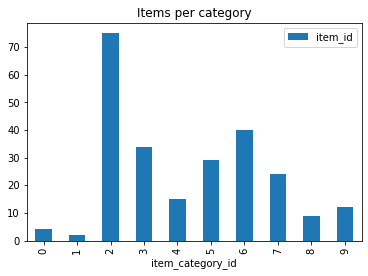

In [28]:
largest_category = items_per_category.head(10).reset_index()
#largest_category
largest_category.plot.bar(x="item_category_id", y="item_id", title="Items per category")

In [17]:
lables = pd.read_csv('Data/test.csv')
lables.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Months/shop item counts
we can group by month and shop_id in order to find the number of items sold in each shop for each month

In [30]:
store_items_sales = sales.groupby(['date_block_num', 'shop_id'])['item_cnt_day'].sum()
store_items_sales.head()

date_block_num  shop_id
0               0          5578
                1          2947
                2          1146
                3           767
                4          2114
Name: item_cnt_day, dtype: int64

## How do we index into this multi-indexed DataFrame

In [34]:
store_items_sales.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [37]:
store_items_sales.loc[(0, 0)] # shop_id = 0 Month = 0

5578

In [38]:
store_items_sales.loc[(1, 0)] # shop_id = 0 Month = 1

6127

Suppose I want all the sales for shops_id = 0?How do i get that ?
we can use loc togheter with the slice(None) output to get everything for a particular shop.The slice method is used to create a "slice object" for "extending slicing".Using None as the argument actually tells pandas to give us everything for that particular value of the index in this case.

In [41]:
store_items_sales.loc[(slice(None), 0)]

date_block_num
0    5578
1    6127
Name: item_cnt_day, dtype: int64

Note there are only two rows for shops_id=0 for this DataFrame.Maybe that particular store closed after those two months into the time period covered by this DataSet 

In [42]:
store_items_sales.loc[(slice(None), 2)]

date_block_num
0     1146
1      488
2      753
3      583
4      553
5      832
6      807
7      875
8      945
9      795
10     862
11    1322
12     890
13     911
14     990
15     791
16     910
17     957
18     838
19     956
20     920
21     945
22    1192
23    1921
24     987
25     907
26     762
27     859
28     843
29     804
30     785
31     942
32     822
33     727
Name: item_cnt_day, dtype: int64

# Total sales by month across all stores 
Let's aggregate total items sold by month across all stores, and see if we can build a predictive model for that data.Note that this data has been stored as a DataFrame for the modelling that will be done later (using the custom transofrmers we will build for those purposes)
We could do the same for total revenue in a similar fashion, by first computing revenue for each individualsale, and then aggregating by month.

In [43]:
total_item_sales = sales.groupby(['date_block_num'])[['item_cnt_day']].sum()
total_item_sales.head()

,item_cnt_day
date_block_num,
0,131479
1,128090
2,147142
3,107190
4,106970


In [44]:
len(total_item_sales)

34

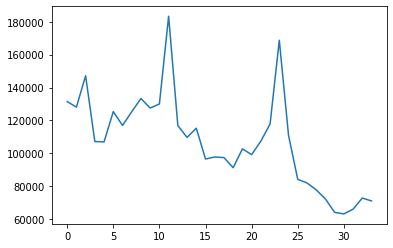

In [45]:
plt.plot(total_item_sales)

In [60]:
#Custom transformers, similar to what we did before 

from sklearn.base import BaseEstimator, TransformerMixin


class IndexSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        #return indices of a data frame for use in other estimators
        pass
    def fit(self, df, y=None):
        return self
    def transform(self, df):
        indices = df.index
        return indices.values.reshape(-1,1)  
class FourierComponents(BaseEstimator, TransformerMixin):
    def __init__(self, freqs):
        # create features based on cos(2*pi/f*t) and sin(2*pi/f*t)
        self.freqs = freqs 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = np.zeros((X.shape[0], 2*len(self.freqs)))
        for i, f in enumerate(self.freqs):
            Xt[:, 2*i] = np.cos(2*np.pi/f*X).reshape(-1)
            Xt[:, 2*i + 1] = np.sin(2*np.pi/f*X).reshape(-1)
        return Xt

In [61]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression

In [85]:
poly = Pipeline([
    ('indices', IndexSelector()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])


# Seasonal components 1/yr means we want the frequency to be 12  every twelve months.
# The spike at 3/yr means we want a frequency to be 4, i.e every 4 months 
fourier = Pipeline([
    ('indices', IndexSelector()),
    ('fourier', FourierComponents([4, 12]))
])
features = FeatureUnion([
    ('trend', poly),
    ('seasonal', fourier)
])

model = Pipeline([
    ('features', features),
    ('scale', StandardScaler()),
    ('estimator', LinearRegression())
])

# Train/Test split, for purposes of testing

Since it's a time series we can't split randomly the data.


In [86]:
cutoff = 30   #value is rather arbitrary , and we have a small dataset 
X_train = total_item_sales[:cutoff]
y_train = total_item_sales[:cutoff]['item_cnt_day'].values.reshape(-1, 1)

X_test = total_item_sales[:cutoff]
y_test = total_item_sales[:cutoff]['item_cnt_day'].values.reshape(-1, 1) 


# The full set of data for later use 
X_full = total_item_sales
y_full = total_item_sales[:cutoff]['item_cnt_day'].values.reshape(-1, 1) 

# Fit the model


In [87]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('trend',
                                                 Pipeline(memory=None,
                                                          steps=[('indices',
                                                                  IndexSelector()),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=2,
                                                                                     include_bias=False,
                                                                                     interaction_only=False,
                                                                                     order='C'))],
                                                          verbose=False)),
                                                ('seasonal'

In [88]:
model.score(X_train, y_train)

0.7127077295583759

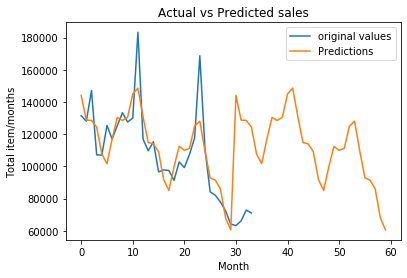

In [84]:
plt.plot(total_item_sales, label='original values')
plt.plot(np.vstack([model.predict(X_train), model.predict(X_test)]), label='Predictions')
plt.xlabel('Month')
plt.ylabel('Total item/months')
plt.title('Actual vs Predicted sales')
plt.legend()

In [71]:
test = pd.read_csv('Data/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [79]:
tes = test.drop('ID' , axis=1)
tes.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
